In [1]:
import pandas as pd


In [2]:
df_species = pd.read_csv("species_info.csv")

In [3]:
df_observations = pd.read_csv("observations.csv")

In [4]:
df_observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [5]:
df_species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [6]:
df_species.groupby('category').size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

In [7]:
print(f"The number of species is {df_species['scientific_name'].nunique()}")

The number of species is 5541


In [8]:
print(f"Number of categories: {df_species.category.nunique()}")
print(f"Categories: {df_species.category.unique()}")

Number of categories: 7
Categories: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


In [10]:
print(f"Number of conservation status: {df_species.conservation_status.nunique()}")
print(f"Conservation status: {df_species.conservation_status.unique()}")

Number of conservation status: 4
Conservation status: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [15]:
print(f"Number of parks: {df_observations.park_name.nunique()}")
print(f"Parks: {df_observations.park_name.unique()}")

Number of parks: 4
Parks: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


In [16]:
print(f"Sum of observations: {df_observations.observations.sum()}")

Sum of observations: 3314739


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df_species.fillna("No Intervation", inplace=True)
df_species.groupby("conservation_status").size()

conservation_status
Endangered              16
In Recovery              4
No Intervation        5633
Species of Concern     161
Threatened              10
dtype: int64

In [54]:
conservationCategory  = df_species[df_species["conservation_status"] != "No Intervation"]\
.groupby(["conservation_status","category"])['scientific_name'].count().unstack()
conservationCategory 

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


Text(0, 0.5, 'Number of Species')

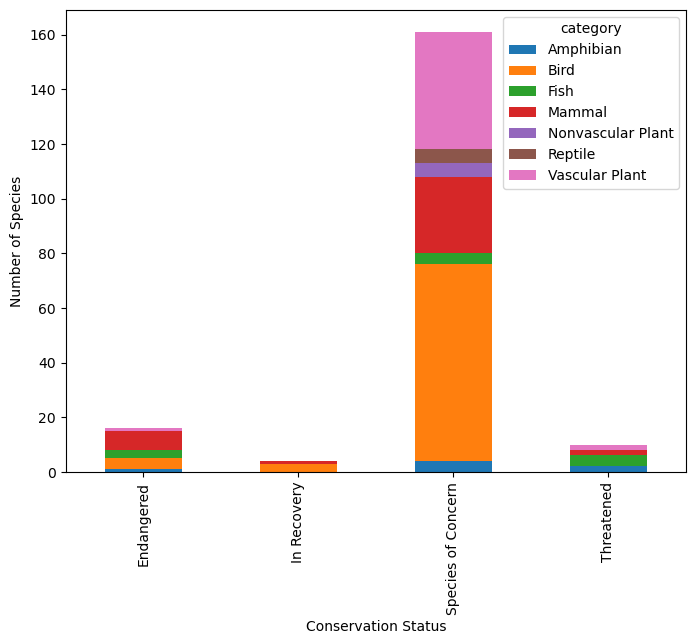

In [57]:
ax = conservationCategory.plot(kind='bar', stacked=True, figsize=(8,6))
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Number of Species")

In [60]:
df_species['is_protected'] = df_species.conservation_status != "No Intervation"
df_species

,category,scientific_name,common_names,conservation_status,is_protected
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervation,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervation,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervation,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervation,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervation,False
...,...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,No Intervation,False
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",No Intervation,False
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",No Intervation,False
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",No Intervation,False


In [81]:
category_counts = df_species.groupby(["category", "is_protected"]).scientific_name.nunique()\
.reset_index().pivot(
    columns="is_protected",
    index="category",
    values="scientific_name"
).reset_index()

category_counts.columns = ["category", "not_protected", "protected"]
category_counts

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


In [86]:
category_counts['percent_protected'] = (category_counts.protected\
/(category_counts.not_protected+category_counts.protected)*100).round(2)
category_counts

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.86
1,Bird,413,75,15.37
2,Fish,115,11,8.73
3,Mammal,146,30,17.05
4,Nonvascular Plant,328,5,1.50
5,Reptile,73,5,6.41
6,Vascular Plant,4216,46,1.08
